In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.signal import firwin
from scipy.signal import freqz
from scipy.signal import find_peaks_cwt
from scipy.signal import butter, lfilter
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot

%matplotlib inline

ordata = np.genfromtxt("team9_assignment7_standing.csv", dtype=float, delimiter=',', names=True)
timestamp = ordata['time']
scaler = preprocessing.MinMaxScaler()
# normazile data
IR = scaler.fit_transform(ordata['IR'])
RED = scaler.fit_transform(ordata['RED'])


# butter filter
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = butter(order, [low, high], btype='band', analog = False)
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def caculateRate(timestamp, data, thres, min_dist, fs):
    peakind = peakutils.indexes(data, thres, min_dist)
    numberOfPeak = len(peakind)
    print "number of peak %d" % numberOfPeak
    rate = np.zeros(numberOfPeak - 1)
    for i in range(1, numberOfPeak):
        interval =  timestamp[peakind[i]]  - timestamp[peakind[i-1]] 
        rate[i-1] =  60 / interval
    return rate

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and wil

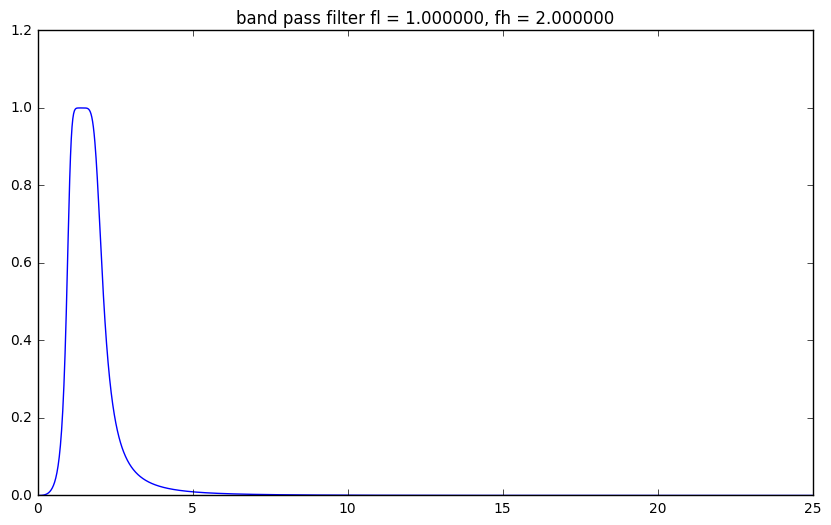

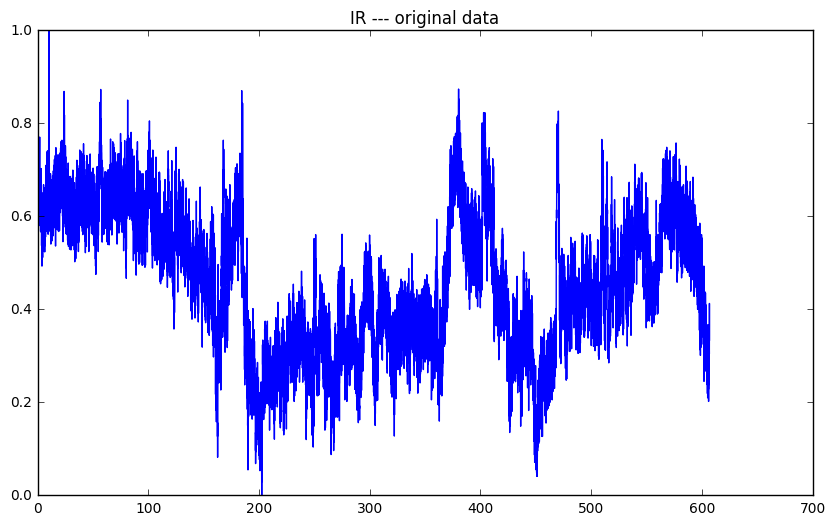

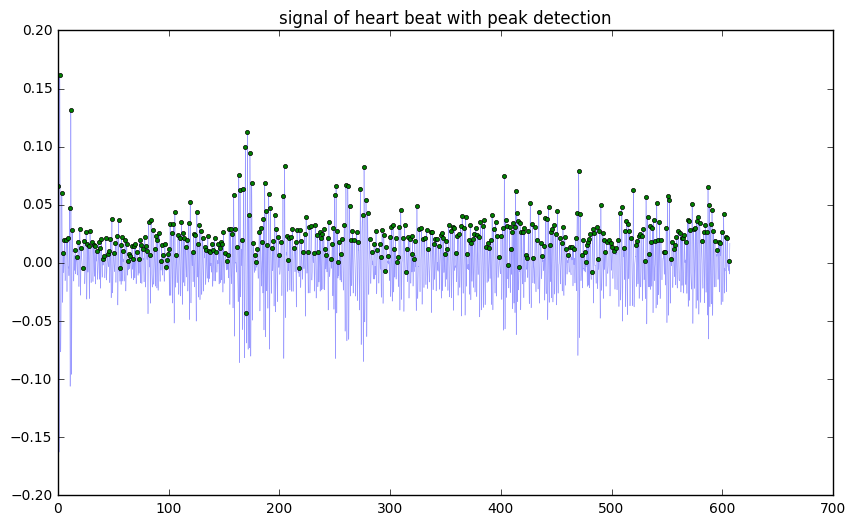

In [15]:
fs = 50.0
lowcut = 1
highcut = 2
order = 3
data = IR
time = timestamp
thres=0.2
min_dist= 20
# lowcut = 1/6.0
# highcut = 1/3.0

# Plot the frequency response for a few different orders.
plt.figure(figsize=(10,6))
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.figure(figsize=(10,6))
plt.plot(time, data)
plt.title("IR --- original data")
pyplot.figure(figsize=(10,6))
heartIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[heartIndex],y[heartIndex], marker="o", ls="", ms=3 )
plt.title("signal of heart beat with peak detection")

[ 48.38709677  48.38709677  48.38709677 ...,  42.85714286  42.85714286
  42.85714286]


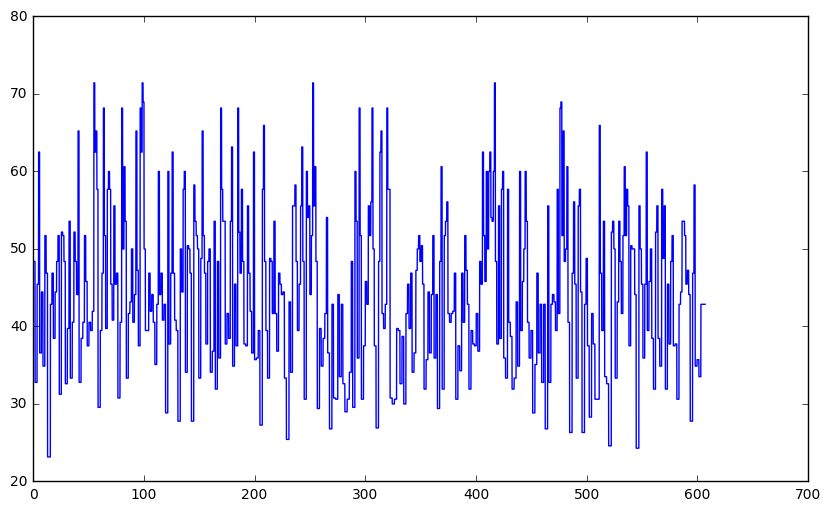

In [17]:
heartBeatArray = np.zeros(len(IR))
count = 1
for i in range(len(heartBeatArray)):
    if i < heartIndex[count] or  count == len(heartRate) - 1 :
        heartBeatArray[i] = heartRate[count - 1]
    else:
        if(count < len(heartRate) - 1):
            count = count + 1
            heartBeatArray[i] = heartRate[count - 1]
print heartBeatArray
plt.figure(figsize=(10,6))
plt.plot(time, heartBeatArray)

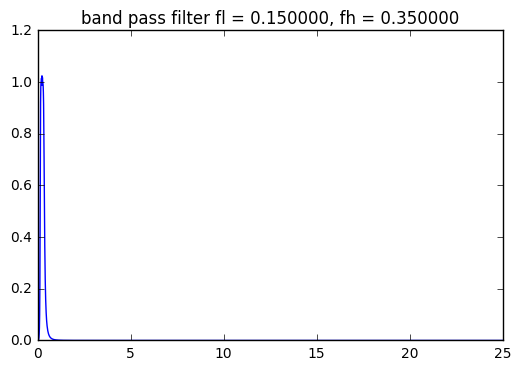

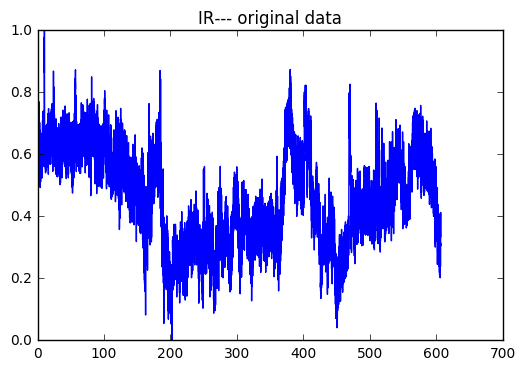

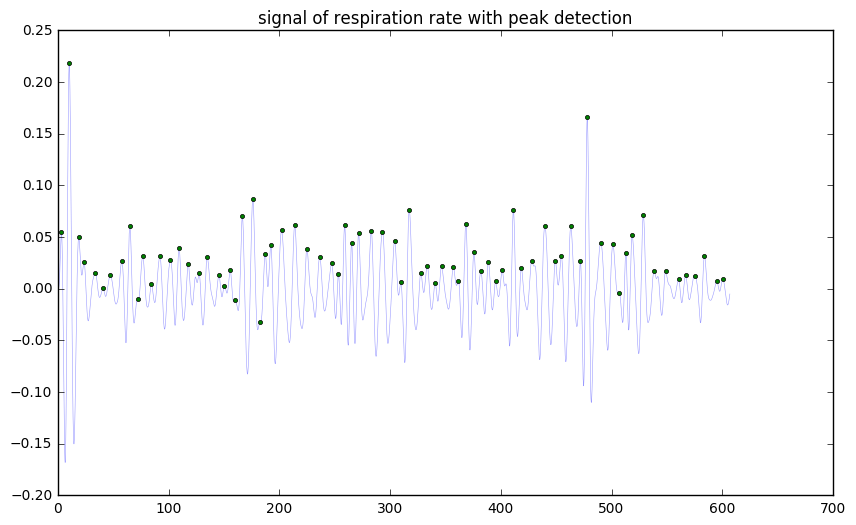

In [18]:
fs = 50.0
lowcut = 0.15
highcut = 0.35
order = 4
data = IR
time = timestamp
thres= 0.01
min_dist = 100
# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.plot(time, data)
plt.title("IR--- original data")
pyplot.figure(figsize=(10,6))
respirationIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[respirationIndex],y[respirationIndex], marker="o", ls="", ms=3 )
plt.title("signal of respiration rate with peak detection")

In [19]:
respirationRate = caculateRate(time, y, thres,min_dist,fs)
# filter abnormal result
result = [x for x in respirationRate if x <= 20 ]
print "the average respiration  rate is %f"% (np.sum(result)/len(result))
print "the real time respiration rate is: \n"
print result

number of peak 76
the average respiration  rate is 8.168511
the real time respiration rate is: 

[8.5348506401137971, 7.0175438596491233, 12.4223602484472, 5.9642147117296247, 8.5348506401137971, 9.1047040971168389, 5.7803468208092514, 8.2079343365253052, 8.5959885386819437, 12.931034482758619, 7.594936708860768, 7.9051383399209447, 6.2630480167014628, 7.741935483870968, 7.2639225181598022, 6.1037639877924734, 8.1743869209809219, 5.6657223796033973, 12.024048096192431, 11.650485436893192, 13.667425968109294, 9.0497737556561155, 6.3424947145877324, 9.104704097116878, 12.958963282937297, 12.12121212121215, 6.1287027579162459, 5.0420168067226863, 5.4644808743169451, 5.1813471502590618, 5.5658627087198509, 9.7560975609756007, 10.810810810810844, 9.5087163232963512, 9.523809523809506, 5.2356020942408472, 5.9347181008901995, 5.4644808743169309, 10.733452593917757, 7.8328981723237341, 5.7747834456207965, 10.362694300518099, 8.3565459610027784, 10.3626943005182, 5.6444026340545648, 13.18681318

[   80   256   470   591   843  1019  1184  1444  1627  1802  1918  2116
  2306  2546  2740  2947  3193  3377  3642  3767  3896  4006  4172  4409
  4574  4690  4814  5059  5357  5632  5922  6192  6346  6485  6643  6801
  7088  7341  7616  7756  7948  8208  8353  8533  8678  8944  9058  9227
  9410  9567  9737  9901 10048 10303 10484 10717 11015 11252 11388 11601
 11819 11974 12279 12554 12694 12846 12990 13243 13485 13746 14038 14198
 14401 14625 14900 15037]


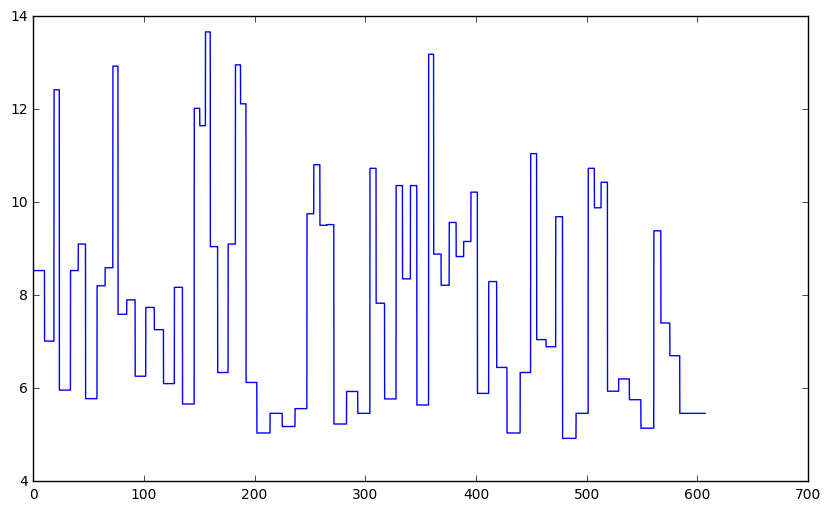

In [20]:
for i in range(len(respirationRate)):
    if respirationRate[i] > 20:
        respirationRate[i] = respirationRate[i - 1]

print respirationIndex
respirationArray = np.zeros(len(IR))
count = 1
for i in range(len(respirationArray)):
    if i < respirationIndex[count] or  count == len(respirationRate) - 1 :
        respirationArray[i] = respirationRate[count - 1]
    else:
        if(count < len(respirationRate) - 1):
            count = count + 1
            respirationArray[i] = respirationRate[count - 1]
plt.figure(figsize=(10,6))
plt.plot(time, respirationArray)

# Calculate SPO2 

## IR signal

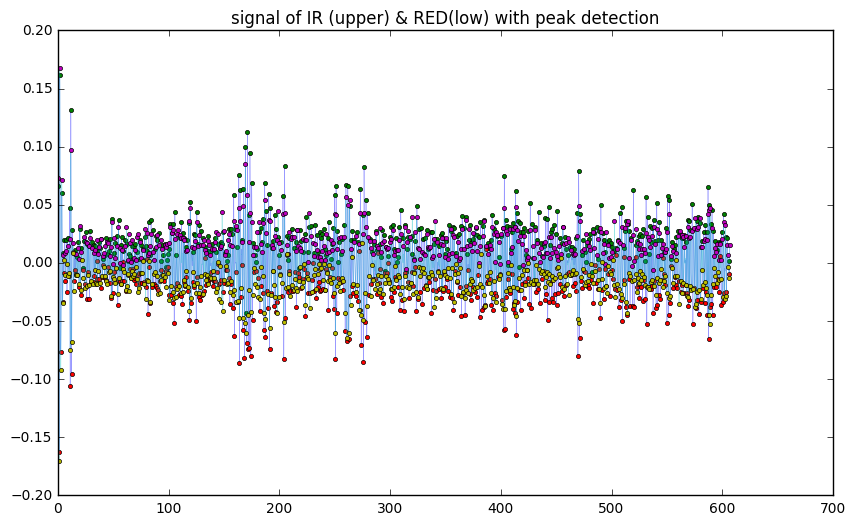

In [21]:
#IROrgin = ordata['IR']
#REDOrgin = ordata['RED']
IROrgin = IR
REDOrgin = RED

fs = 50.0
lowcut = 1
highcut = 2
order = 3

IROrgin = butter_bandpass_filter(IROrgin, lowcut, highcut, fs, order)
REDOrgin = butter_bandpass_filter(REDOrgin, lowcut, highcut, fs, order)
time = timestamp
thres=0.05
min_dist=20
pyplot.figure(figsize=(10,6))
# the index of "postive" peak for IR signal
indexPositiveIR = peakutils.indexes(IROrgin, thres, min_dist)
# the index of "negative" peak for IR signal
indexNegativeIR = peakutils.indexes(-1*IROrgin, thres, min_dist)
# the index of "postive" peak for RED signal
indexPositiveRED = peakutils.indexes(REDOrgin, thres, min_dist)
# the index of "negative" peak for RED signal
indexNegativeRED = peakutils.indexes(-1*REDOrgin, thres, min_dist)
# we find the 15th negative peak will be wrong tagged for "RED" signal
# so we manually remove this point from our indexNegativeRED tuple using following code
indexNegativeRED = list(indexNegativeRED)
del indexNegativeRED[14]
plt.plot(time, IROrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveIR],IROrgin[indexPositiveIR], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeIR],IROrgin[indexNegativeIR], marker="o", ls="", ms=3 )
plt.plot(time, REDOrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveRED],REDOrgin[indexPositiveRED], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeRED],REDOrgin[indexNegativeRED], marker="o", ls="", ms=3 )
plt.title("signal of IR (upper) & RED(low) with peak detection")

In [24]:
def calculateDC(data):
    DC = np.zeros(len(data) - 1) 
    for i in range(len(DC)):
        DC[i] = (data[i + 1] + data[i])/2.0
    return DC

def calculateAC(positive, negative):
#     if len (positive) != len(negative):
#          raise ValueError("the input data should has same dimension")
    minLen = min(len(positive), len(negative))
    AC = np.zeros(minLen - 1)
    for i in range(len(AC)):
        AC[i] = positive[i + 1] - negative[i]
    return AC


ACIR = abs(calculateAC(IROrgin[indexPositiveIR], IROrgin[indexNegativeIR]))
ACRED = abs(calculateAC(REDOrgin[indexPositiveRED], REDOrgin[indexNegativeRED]))

minLen = min(len(ACIR), len(ACRED))
ACIR = ACIR[0:minLen]
ACRED = ACRED[0:minLen]
# DCIR = IROrgin[indexNegativeIR]
# DCRED = REDOrgin[indexNegativeRED]
DCIR = abs(calculateDC(indexNegativeIR))
DCRED = abs(calculateDC(indexNegativeRED))

DCIR = DCIR[0:minLen]
DCRED = DCRED[0:minLen]


ratioAverage = (ACRED * DCIR) * 1.0/(ACIR * DCRED)
spo2 = -45.060*ratioAverage* ratioAverage + 30.354 *ratioAverage + 94.845 

for i in range(len(spo2)):
    if spo2[i] < 90:
        spo2[i] = spo2[i-1] 

count = len(spo2) - 1
while(count >= 0):
    if spo2[count] < 90:
        spo2[count] = spo2[count+1]
    count = count - 1

97.1506535479


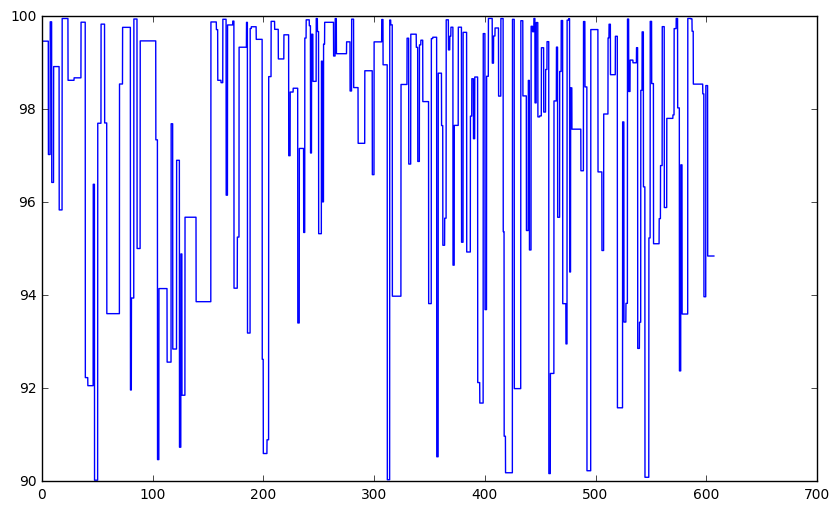

In [32]:
spo2Array = np.zeros(len(IR))
count = 1
for i in range(len(spo2Array)):
    if i < indexPositiveIR[count] or  count == len(spo2) - 1 :
        spo2Array[i] = spo2[count - 1]
    else:
        if(count < len(spo2) - 1):
            count = count + 1
            spo2Array[i] = spo2[count - 1]
plt.figure(figsize=(10,6))
plt.plot(time, spo2Array)
print sum(spo2Array)/len(spo2Array)

In [27]:
saveData = np.zeros((len(IR), 9))
ir = ordata['IR']
red = ordata['RED']
x = ordata["X"]
y = ordata["Y"]
z = ordata["Z"]

for i in range(len(IR)):
    saveData[i, 0] = timestamp[i]
    saveData[i, 1] = ir[i]
    saveData[i, 2] = red[i]
    saveData[i, 3] = x[i]
    saveData[i, 4] = y[i]    
    saveData[i, 5] = z[i]
    saveData[i, 6] = heartBeatArray[i]
    saveData[i, 7] = respirationArray[i]
    saveData[i, 8] = spo2Array[i]

In [28]:
np.savetxt("team9_assignment7_standing.csv", saveData, fmt='%.3f', header="Time,IR, RED, X, Y, Z, Heart Rate, Resoiration Rate, SPO2", delimiter=',')

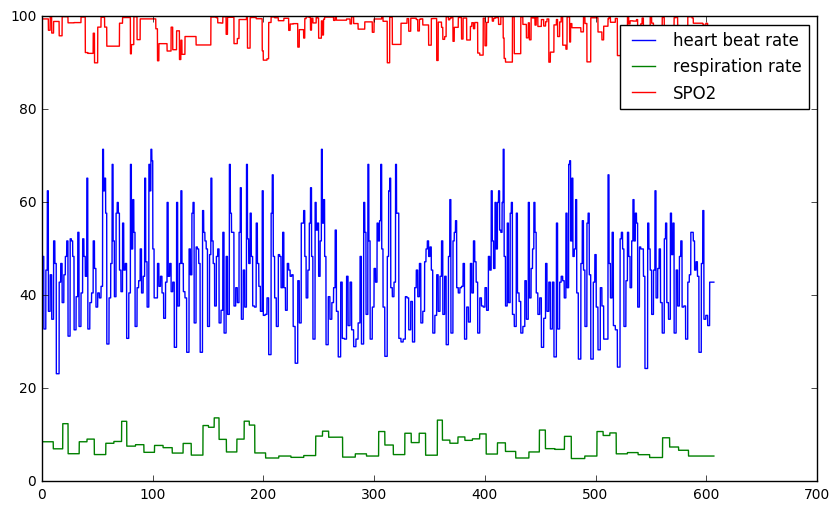

In [29]:
plt.figure(figsize=(10,6))
plt.plot(time, heartBeatArray, label='heart beat rate')
plt.plot(time, respirationArray, label = "respiration rate")
plt.plot(time, spo2Array, label = "SPO2")
plt.legend()

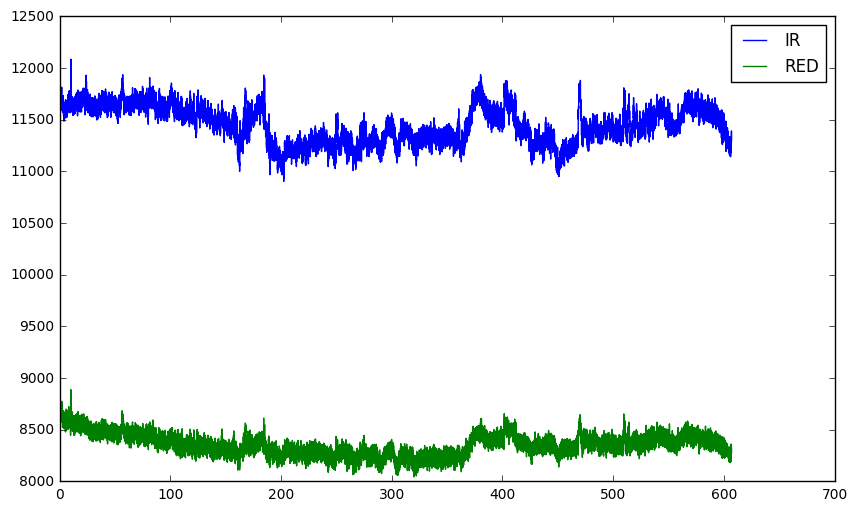

In [30]:
plt.figure(figsize=(10,6))
plt.plot(time, ir, label = "IR")
plt.plot(time, red, label = "RED")
plt.legend()

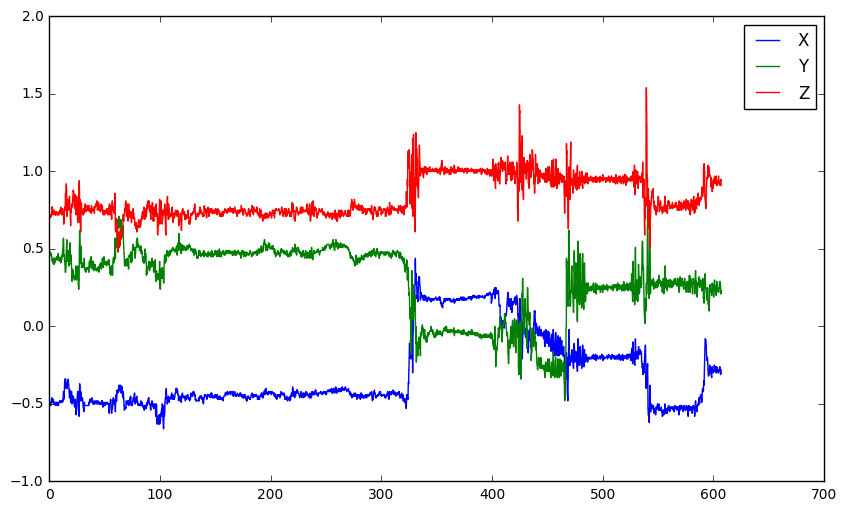

In [31]:
plt.figure(figsize=(10,6))
plt.plot(time, x, label = "X")
plt.plot(time, y, label = "Y")
plt.plot(time, z, label = "Z")

plt.legend()

In [33]:
np.sum(spo2Array)/len(spo2Array)

97.150653547903104